In [30]:
import pandas as pd
import numpy as np
import seaborn as sns


##Creacion Data Frame con datos artificiales.
#Generar unos datos de la dostribución log-normal, con un promedio de daño del 8% y una desviación estandar de 3.6 (si algún valor es negativo se convierte a 0)

np.random.seed(2022)
mean, sigma = 1/8, 3.6
porc_enf = np.random.lognormal(mean,sigma,100)#revisar
porc_enf = pd.DataFrame(porc_enf,columns=['damg_perc'])

print("valores menores a cero en ", 
      porc_enf[porc_enf['damg_perc'] <0].count()) 

porc_enf.loc[porc_enf.damg_perc<0,"damg_perc"]=0

print("valores menores a cero en ", 
      porc_enf[porc_enf['damg_perc'] <0].count()) 

print(porc_enf)
print(porc_enf.min())
print(porc_enf.max())



valores menores a cero en  damg_perc    0
dtype: int64
valores menores a cero en  damg_perc    0
dtype: int64
      damg_perc
0      1.130997
1      0.421201
2      0.686309
3   1436.363955
4      3.128625
..          ...
95     0.128136
96    31.458943
97     0.335814
98     0.957294
99     0.036216

[100 rows x 1 columns]
damg_perc    0.000027
dtype: float64
damg_perc    3388.713763
dtype: float64


In [46]:
#Extraer media, mediana, quartiles y percentiles (desde 5% hasta 95% cada 5)

media = porc_enf["damg_perc"].mean()
mediana = porc_enf["damg_perc"].median()

print(f"La mediana es:{mediana}")
print(f"La media es:{media}")

porc_enf_serie = pd.Series(porc_enf["damg_perc"])##convertir el DT en una serie.
print(porc_enf_serie.quantile([0.25, 0.75, 0.90, 0.95]))

arr_percnt=np.arange(0.05,0.95,0.05)#Crear un array determiando

print(porc_enf_serie.quantile(arr_percnt))


La mediana es:1.1719747684763848
La media es:87.059562081388
0.25     0.107658
0.75    13.341902
0.90    46.868029
0.95    79.143182
Name: damg_perc, dtype: float64
0.05     0.004430
0.10     0.008090
0.15     0.037806
0.20     0.061125
0.25     0.107658
0.30     0.196086
0.35     0.363922
0.40     0.598740
0.45     0.770384
0.50     1.171975
0.55     2.646871
0.60     3.598332
0.65     4.371281
0.70     8.844703
0.75    13.341902
0.80    23.679300
0.85    34.066971
0.90    46.868029
Name: damg_perc, dtype: float64


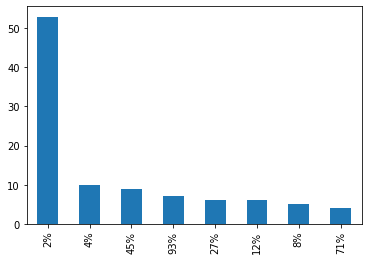

In [49]:
#Categorizar la variable según la escala diagramtica del articulo referencia
cat_enf = []
for pe_i in porc_enf['damg_perc']:
  if(pe_i <= 2):
    cat_enf.append('2%')
  elif(pe_i <= 4):
    cat_enf.append('4%')
  elif(pe_i <= 8):
    cat_enf.append('8%')
  elif(pe_i <= 12):
    cat_enf.append('12%')
  elif(pe_i <= 27):
    cat_enf.append('27%')
  elif(pe_i <= 45):
    cat_enf.append('45%')
  elif(pe_i <= 71):
    cat_enf.append('71%')
  else:
    cat_enf.append('93%')

cat_enf_serie = pd.Series(cat_enf)
cat_enf_serie.value_counts().plot(kind='bar')

In [ ]:
#Posición en la que debo ubicarme en la escala para estimar la severidad real

cont = cat_enf_serie.value_counts()

frec1 = cont*[2.5, 5, 10, 20, 40, 80]#revisar

print(frec1.sum()/100)



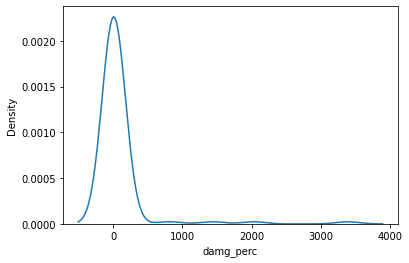

In [54]:
sns.kdeplot(porc_enf["damg_perc"])